In [1]:
import textgrid as t
import wave
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 32.0)
import numpy as np

In [2]:
# open the sound file
w = wave.open('CATH1.WAV')

# print parameters of sound file
params = w.getparams()
print params

#sample freq 
freq = params[2]

# length in seconds
dur = params[3]/params[2]
print dur

(1, 2, 44100, 6651648, 'NONE', 'not compressed')
150


Tiers: 1

***
Tier: 1
7


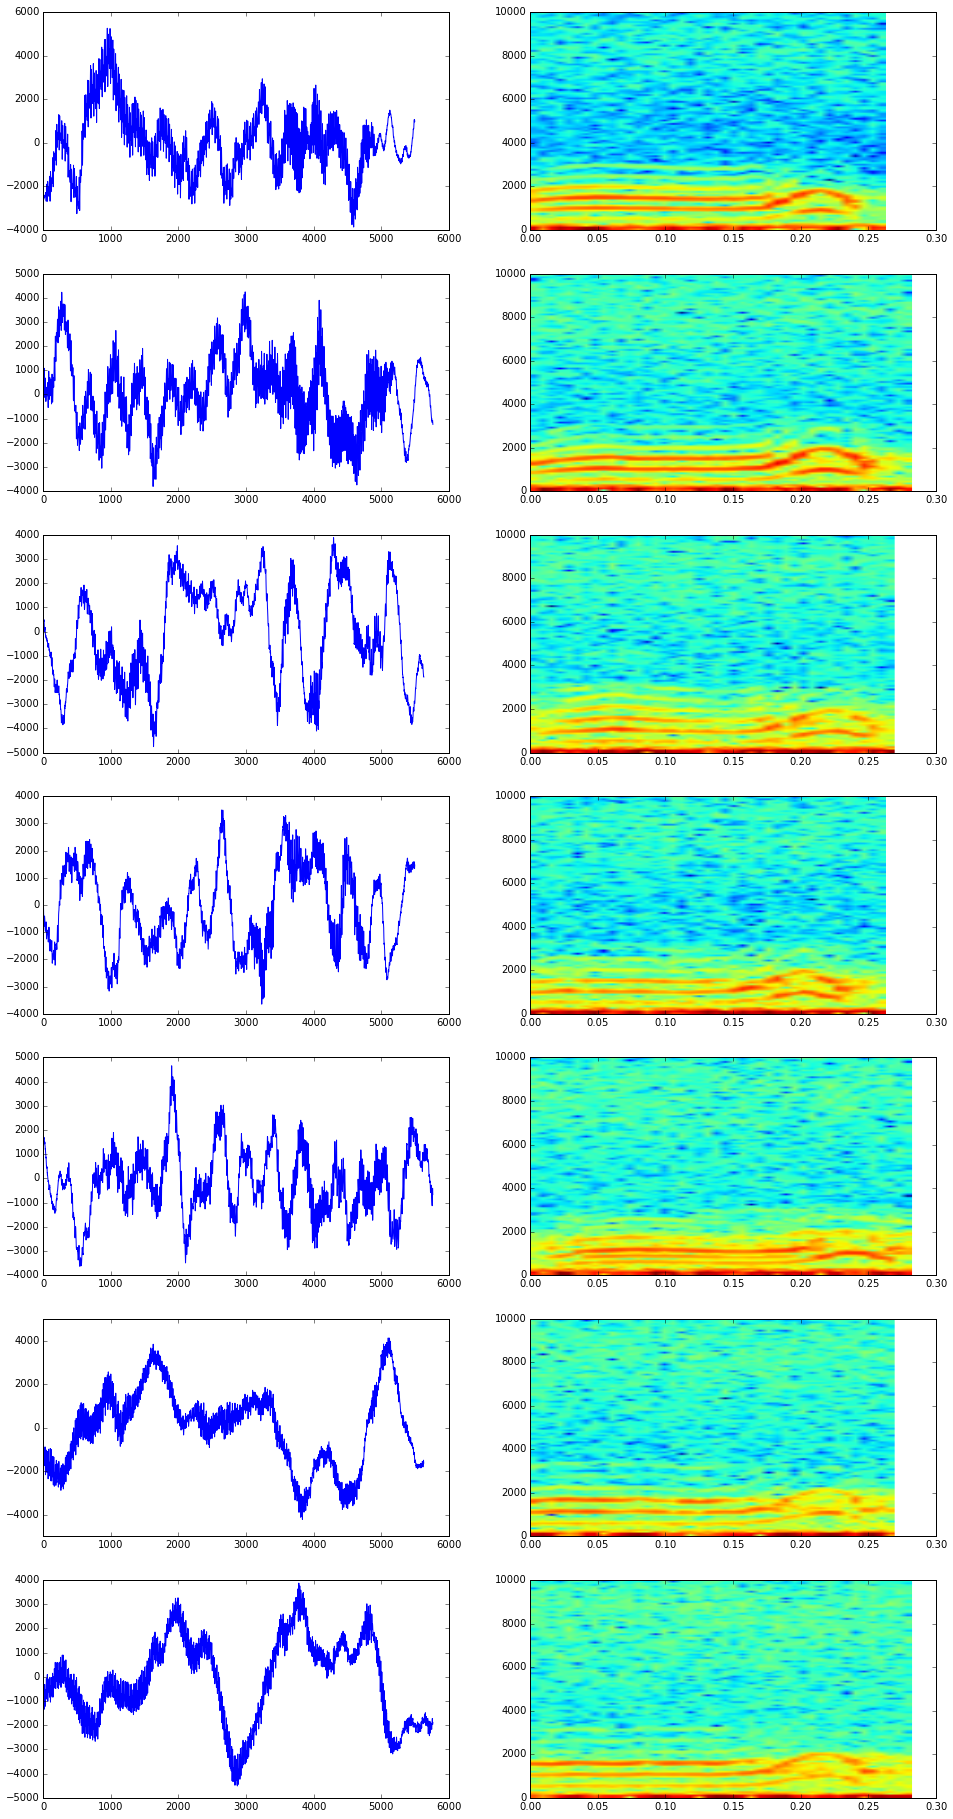

In [3]:
f = open('CATH1.TextGrid','r')

fid = t.TextGrid(f.read())
print "Tiers:", fid.size

for i, tier in enumerate(fid):
    print "\n***"
    print "Tier:", i + 1
    #print tier
    trans = tier.make_simple_transcript()
    # search for something in the list
    matches = [x for x in trans if x[2] == "nab"]
    print len(matches)
    cols = 2
    rows = len(matches)
    subplt_nr = 1
    
    # space to store all syable data - for sound file export
    all_sylls = []
    
    # get soundwave of the items in the search result
    for item in matches:
        start_pos = int(float(item[0]) * freq)
        stop_pos = int(float(item[1]) * freq)
        w.setpos(start_pos)
        
        # get syllable data
        sample = w.readframes(stop_pos-start_pos)
        waveform = np.fromstring(sample, 'Int16')
        # store syllable data 
        all_sylls.append(waveform.tolist())
        all_sylls.append([0]*10000)
        
        # plot signal
        plt.subplot(rows, cols, (subplt_nr*2)-1)
        plt.plot(waveform)
        # plot fft of signal
        plt.subplot(rows, cols, subplt_nr*2)
        #t = np.fft.fft(waveform)
        #plt.plot(t.real)
        plt.specgram(waveform, NFFT=256, Fs=20000)
        
        subplt_nr = subplt_nr +1


In [4]:
# get signal to  the right  format
C = [item for sublist in all_sylls for item in sublist]
signal = "".join((wave.struct.pack('h', item) for item in C))

# prepate output file
output = wave.open('test_output.wav', 'w')
output.setparams((1, 2, 44100, 0, 'NONE', 'not compressed'))

# write to file
output.writeframes(signal)
output.close()